# Thoughts and Deaths

### This program is designed to calculate the probability that person A thinks/feels something about another person B and person B dies on that same day

### We'll start by entering basic population data.
1. We know there are 7.95 Giga humans (2022)
2. We know that 25% of humans are under 15 years old [1]
3. We know that at least 10% of people have mental illness [2]
4. We know that at least 10% of people with mental illness are children 14 years old or younger [8]

To do this calculation, we'll have to make some assumptions:
1. Someone might think that only half of the population is awake at any given time (since half of the world has sun at any given time), but we'll do the calculations for 24 hours so everyone gets to be awake at some point.
2. We'll take out people with mental illness and people under 15, so we don't have things like "he could have imagined it."

### Preamble
We import some stuff and added the above mentioned data

In [1]:
#Import libraries for ploting and calculating and to make things pritier
#%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as ipw
import IPython.display

In [7]:
def usable_pop(population):
    awake    = population/2
    children = awake * 0.25
    Children = population * 0.25
    sick     = awake * (0.1-0.01)
    Sick     = population * (0.1-0.01)
    usables  = awake - children - sick # We take out the people with mental illness and children under 15.
    Usables  = population - Children - Sick # We take out the people with mental illness and children under 15.
    print('The number of conscious population at a given time without mental problems and over 15 years old is ', usables)
    return Usables
population = 7950000000
Usables = usable_pop(population)
print('The population without mental problems and over 15 years old is ', Usables)

The number of conscious population at a given time without mental problems and over 15 years old is  2623500000.0
The population without mental problems and over 15 years old is  5247000000.0


### We establish the rate of occurrence
We need to know how many times a year a person has a strong thought or emotion associated with someone they know, we will call this `the feeling`
For this, the user will be asked to enter how many times a year `the feeling` occurs

In [8]:
def ocurring(anual_rate):
    daily_rate = (Usables*anual_rate)/365
    hourly_rate = daily_rate /24
    minute_rate = hourly_rate / 60
    second_rate = minute_rate / 60
    print('Number of people thinking or having a strong emotion associated with someone they know (truncated without decimal):')
    print('In each day :',int(daily_rate))
    print('In each hour :',int(hourly_rate))
    print('In each minute :',int(minute_rate))
    print('In each second :',int(second_rate))

### Define the widgets

In [10]:
slider_rate = ipw.IntSlider(
    min = 1,
    max = 365,
    step = 1,
    description = '# Times'
)

In [11]:
slider_rate_2 = ipw.IntSlider(
    min = 1,
    max = 365,
    step = 1,
    description = '# Times',
    continuous_update = False
)

In [12]:
slider_aqcuaintance = ipw.IntSlider(
    min = 1,
    max = 536,
    step = 1,
    description = 'Aqcuaintance'
)

In [13]:
slider_aqcuaintance_2 = ipw.IntSlider(
    min = 1,
    max = 536,
    step = 1,
    description = 'Aqcuaintance',
    continuous_update = False
)

## First interaction

With this we can begin to suspect what is going to happen and we can get an idea of ​​what the preliminary data is like

In [15]:
print('How many times per year does this FEELING happens to a person? ')
ipw.interactive(
    ocurring,
    anual_rate=slider_rate
)

How many times per year does this FEELING happens to a person? 


interactive(children=(IntSlider(value=37, description='# Times', max=365, min=1), Output()), _dom_classes=('wi…

## Some extra data to consider
1. Over the course of 80 years, a person knows an average of 5,000 people in total. [3]
2. A typical person generally knows 535 people. [4]
3. A typical person generally has 150 "close" relationships [5]
4. 147,118 people die every day [6]
5. The average life expectancy worldwide is 72 years [7]

Next, the probability of the event occurring to a typical person and the probability of it occurring to at least 1 acquaintance of a typical person must be calculated, according to the 3 data sets of acquaintances.

For this, the following equation must be taken into account

\begin{equation}
P\{\text{Occurs once in N}\} = 1 - (1-p)^{N}
\end{equation}
Where $P$ is the probability that something happens at least once out of N occasions and $p$ is the probability that it occurs on one occasion.

### For example, let's look at the probability that a 6-sided die rolled 4 times will come up with a 3 at least once

The probability of getting a 3 when rolling a die is $\frac{1}{6}$, or 1 out of every 6 times. But if I roll the die 10 times, then the equation will be

\begin{equation}
P\{\text{Occurs once in 10}\} = 1 - (1-\frac{1}{6})^{10}
\end{equation}

whose result is: 0.838, or 83%

In [17]:
#calculation for the die
print(  1-((1-(1/6))**10)  )

0.8384944171101543


In [22]:
#Lets add the data
muertes = 147118

### Applying to our case
Based on the previous equation and basic probability we have the following equations
1. The probability that someone thinks about another person and that person dies that same day is given by:

\begin{eqnarray}
Prob_{occurs} = \frac{F}{U}\cdot\frac{D}{Pop}
\end{eqnarray}

Where $F$ is the number of people who on any given day have "the feeling", $U$ is the amount of population available for that to happen (awake, conscious, etc.), $D$ is the number of daily deaths and $Pop$ is the world population

2. The probability that this situation happens to a particular person throughout his/her life is:

\begin{equation}
Prob_{person} = 1-\left( 1-\frac{D}{Pop} \right)^{\left( \text{Rate}\cdot\text{Age} \right)}
\end{equation}

Where $Rate$ is the number of times the sensation occurs to someone in a year

3. The probability that this situation occurs to at least 1 acquaintance of someone over their lifetime is:

\begin{equation}
Prob_{acquaintance} = 1-\left( 1-Prob_{person} \right)^{\left(Acquaintances\right)}
\end{equation}

## Let's interact with the data!

Below are some bars to see in real time how the number of people we know and the number of times a year we can have this mysterious feeling affect us.

In [29]:
def widget_datos(grupo, tasa_anual):
    prob_ocur_persona = 1-(1- muertes/poblacion)**(tasa_anual*72)
    prob_amigos = 1-(1-prob_ocur_persona)**(grupo)
    
    prob_ocur_persona_h = 1-(1- (muertes/24)/poblacion)**(tasa_anual*72)
    prob_amigos_h = 1-(1-prob_ocur_persona_h)**(grupo)
    
    prob_ocur_persona_m = 1-(1- (muertes/24/60)/poblacion)**(tasa_anual*72)
    prob_amigos_m = 1-(1-prob_ocur_persona_m)**(grupo)
    
    prob_ocur_persona_s = 1-(1- (muertes/24/60/60)/poblacion)**(tasa_anual*72)
    prob_amigos_s = 1-(1-prob_ocur_persona_s)**(grupo)
    
    tasa_diaria = (Usables*tasa_anual)/365
    p_muerte_pensado = (tasa_diaria/Usables)*(muertes/poblacion) #probabilidad de que una persona sea pensada y que muera
    prob_ocur_tu = 1-(1-muertes/poblacion)**(tasa_anual*95)
    prob_ocur_tu_h = 1-(1-(muertes/24)/poblacion)**(tasa_anual*95)
    prob_ocur_tu_m = 1-(1-(muertes/24/60)/poblacion)**(tasa_anual*95)
    prob_ocur_tu_s = 1-(1-(muertes/24/60/60)/poblacion)**(tasa_anual*95)
    print('---------------------')
    print('For the number of acquaintances ',grupo)
    print('The probability that in 72 years you will know someone who has had this happen to them is ', prob_amigos)
    print('And if we want it to be exact to the hour, minute or second? For an acquaintance who lives to be 72 years old:')
    print('The probability that it is accurate to the hour is ', prob_amigos_h)
    print('The probability that it is accurate to the minute is ', prob_amigos_m)
    print('The probability that it is exact to the second is ', prob_amigos_s)
    print('---------------------')
    print('---------------------')
    print('On a given day ',p_muerte_pensado*tasa_diaria, ' People have a feeling about someone they know and that someone dies.')
    print('The probability of this happening to you once in 95 years of life is ', prob_ocur_tu)
    print('And if we want it to be exact to the hour, minute or second? for someone who lives 95 years:')
    print('The probability that it is accurate to the hour is ', prob_ocur_tu_h)
    print('The probability that it is accurate to the minute is ', prob_ocur_tu_m)
    print('The probability that it is exact to the second is ', prob_ocur_tu_s)
    print('---------------------')

In [30]:
print('Here you can interact with the data!')
print('Choose the number of acquaintances between 1 and 536')
print('Choose the number of times per year that someone has the sensation between 1 and 365')
ipw.interactive(
    widget_datos,
    grupo = slider_aqcuaintance,
    tasa_anual = slider_rate,
)

Here you can interact with the data!
Choose the number of acquaintances between 1 and 536
Choose the number of times per year that someone has the sensation between 1 and 365


interactive(children=(IntSlider(value=536, description='Aqcuaintance', max=536, min=1), IntSlider(value=3, des…

## Interactive Plot!

### But first, some functions...

In [35]:
# function for the probability of having an acquaintance who thought of someone and that person died based on age.
def prob_conocer(edad,grupo,tasa_anual):
    '''
    Probability of knowing someone who has had this happen to them (thinking about someone and that person dying), as a function of age.
    '''
    prob_ocur_persona = 1-(1-muertes/poblacion)**(tasa_anual*(edad-15))
    prob_amigos = 1-(1-prob_ocur_persona)**(grupo)
    if edad>15:
        return prob_amigos
    else:
        return 0

In [36]:
#we define some useful variables and also the function that plots the first graph

def grafico1(grupo,tasa_anual):
    edades_numero  = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
    plt.figure(figsize=(5,3), dpi=300)
    plt.plot(range(15,73),[prob_conocer(edad,grupo,tasa_anual) for edad in range(15,73)],label='15-72 years', 
             marker='.', linewidth=2, markersize = 2, markeredgecolor = 'w')
    plt.xlabel('Age',fontdict={'fontname': 'Corbel', 'fontsize':13})
    plt.ylabel('Probability of knowing someone who has had this happen to them', 
               fontdict={'fontname': 'Corbel', 'fontsize':8})
    plt.title('Probability by age for '+str(tasa_anual)+' events per year',
              fontdict={'fontname': 'Corbel', 'fontsize':15})
    plt.xticks(edades_numero)
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.show()

### Now, the graph!

Let's make a graph, the first one will be the probability of meeting someone who happens to you according to the age we want.

In [38]:
#but with widgets
print('You can use the bars to modify the number of people known by any given person')
print('and the number of times a year a person can have "the feeling".')
ipw.interactive(
    grafico1,
    grupo = slider_aqcuaintance_2,
    tasa_anual = slider_rate_2,
)

You can use the bars to modify the number of people known by any given person
and the number of times a year a person can have "the feeling".


interactive(children=(IntSlider(value=497, continuous_update=False, description='Aqcuaintance', max=536, min=1…

### Now with the more exact data...
Next we will try to be a little more strict with the data, this means that we will further increase the possibility that this situation is a simple coincidence. This second graph will do the same but with more exact data on the number of acquaintances according to age obtained from [3]

#### As always, first the data

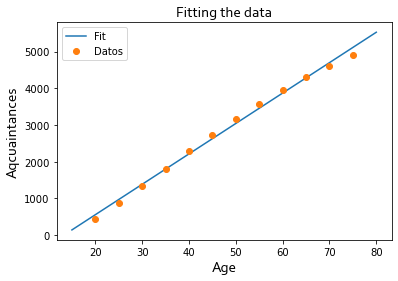

In [44]:
#string of age ranges
edades_string  = ['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80']
#string of age numbers
edades_numero  = [20     , 25    , 30    , 35    , 40    , 45    ,50     , 55    , 60    , 65    , 70    , 75  ]
#string of aqcuaintances
conocidos      = [447    , 875   , 1327  , 1808  , 2282  , 2740  , 3173  , 3581  , 3958  , 4303  , 4611  , 4897]
#But we also know that the progression is linear as shown in the graph in [3], so we will add
#manual data to have a smoother curve in the result.
#The range will be from 15 to 80 years.

ed  = list(range(15,81))
funcion = np.polyfit(edades_numero,conocidos,1)
con = np.poly1d(funcion)
plt.figure()
plt.xlabel('Age',fontdict={'fontname': 'Corbel', 'fontsize':15})
plt.ylabel('Aqcuaintances',fontdict={'fontname': 'Corbel', 'fontsize':15})
plt.title('Fitting the data',fontdict={'fontname': 'Corbel', 'fontsize':15})
plt.plot(ed,con(ed),label='Fit')
plt.plot(edades_numero,conocidos,'o',label='Datos')
plt.legend()
plt.show()

#### Defining new functions

In [40]:
def prob_conocer_2(edad,grupo,tasa_anual):
    '''
    Probability of knowing someone who has had this happen to them (thinking about someone and that person dying), as a function of age.
    '''
    #Vectors to modify
    prob_ocur_persona = list(range(0, len(edad)))
    prob_amigos       = list(range(0, len(edad)))
    for i in range(len(edad)):
        prob_ocur_persona[i] = 1-(1-muertes/poblacion)**(tasa_anual*(edad[i]-15))
        prob_amigos[i] = 1-(1-prob_ocur_persona[i])**(grupo[i])
    if edad[0]>=15:
        return prob_amigos
    else:
        return 0

def grafico2(tasa_anual):
    y_fit=prob_conocer_2(ed,con(ed),tasa_anual)
    y=prob_conocer_2(edades_numero,conocidos,tasa_anual)
    plt.figure(figsize=(5,3), dpi=300)
    plt.plot(ed,y_fit, linewidth=2, color= 'orange', label='Curva Ajustada')
    plt.plot(edades_numero, y,
             marker='.', linewidth=2, markersize = 7, markeredgecolor = 'red',label='Curva Dura')
    plt.xlabel('Age',fontdict={'fontname': 'Corbel', 'fontsize':13})
    plt.ylabel('Probability of knowing someone who has had this happen to them',fontdict={'fontname': 'Corbel', 'fontsize':8})
    plt.title('Probability by age for '+str(tasa_anual)+' events per year', fontdict={'fontname': 'Corbel', 'fontsize':15})
    plt.xticks(edades_numero)
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.legend()
    plt.show()

def prob_conocer_3(edad,grupo, usables,muertes,tasa_anual):
    '''
    Probability of knowing someone who has had this happen to them (thinking about someone and that person dying), as a function of age.
    '''
    prob_ocur_persona = np.zeros( shape=(len(edad),len(tasa_anual)) )  
    prob_amigos       = np.zeros( shape=(len(edad),len(tasa_anual)) )  
    for i in range(len(edad)):
        for j in range(len(tasa_anual)):
            prob_ocur_persona[i,j] = 1-(1-muertes/poblacion)**(tasa_anual[j]*(edad[i]-15))
            prob_amigos[i,j] = 1-(1-prob_ocur_persona[i,j])**(grupo[i])
    return prob_amigos
        


## 2nd Interactive Plot!

In [41]:
#With widgets
print('You can use the bars to modify the number of times per year a person can have "the feeling."')
ipw.interactive(
    grafico2,
    tasa_anual = slider_rate_2,
)

You can use the bars to modify the number of times per year a person can have "the feeling."


interactive(children=(IntSlider(value=4, continuous_update=False, description='# Times', max=365, min=1), Outp…

## And for the grand finale
Now all that remains is to make a 3D graph where you can see how the probability changes depending on the number of annual events and the age.
This graph will not be interactive because it already has all the information inside it

### Define variables

In [46]:
#we create the vectors that we will need to generate the matrix
tasa_anual_2  = list(range(1,366))
tasa_diaria_2  = list(range(1,366))
for i in range(0,len(tasa_anual_2)):
    tasa_diaria_2 [i] = tasa_anual_2[i]*Usables/365

#Generate the matrix
calculo = prob_conocer_3(ed,con(ed), Usables,muertes,tasa_anual_2)

### And we plot

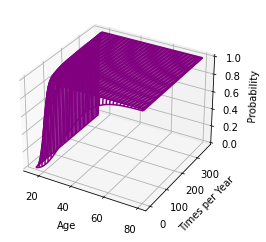

In [59]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#We generate a grid on which to display the results
X,Y = np.meshgrid(ed,tasa_anual_2)
#We transpose the results to fit the grid
Z=np.transpose(calculo)
ax.set_xlabel('Age')
ax.set_ylabel('Times per Year')
ax.set_zlabel('Probability')

#plt.zlabel('Probabiliad')
#plt.title('Probabilidad por Edad por Eventos al Año')
ax.plot_wireframe(X,Y,Z, color='purple')

#ax.title =('Probabilidad por Edad y por Eventos al Año')
plt.show()



## References

1. https://datos.bancomundial.org/indicador/SP.POP.0014.TO.ZS
2. https://ourworldindata.org/mental-health
3. https://elpais.com/tecnologia/2019/07/09/actualidad/1562709377_124629.html
4. https://observatoriosociallacaixa.org/-/cuantos-conocidos-tenemos
5. https://nationalpost.com/news/world/humans-only-able-to-maintain-five-relationships-in-their-inner-circle-and-150-in-their-outer-circle-study-finds
6. https://www.weforum.org/agenda/2020/05/how-many-people-die-each-day-covid-19-coronavirus/
7. https://www.google.com/search?q=esperanza+de+vida+promedio+mundial&oq=esperanza+de+vida+promedio&aqs=chrome.0.0j69i57j0l6.5203j0j7&sourceid=chrome&ie=UTF-8
8. https://www.mentalhealth.org.uk/statistics/mental-health-statistics-children-and-young-people
